In [59]:
# LSTM for international airline passengers problem with regression framing
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [60]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [61]:
# fix random seed for reproducibility
numpy.random.seed(0)

In [62]:
# load the dataset
dataframe = read_csv('data/international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

<IPython.core.display.Javascript object>


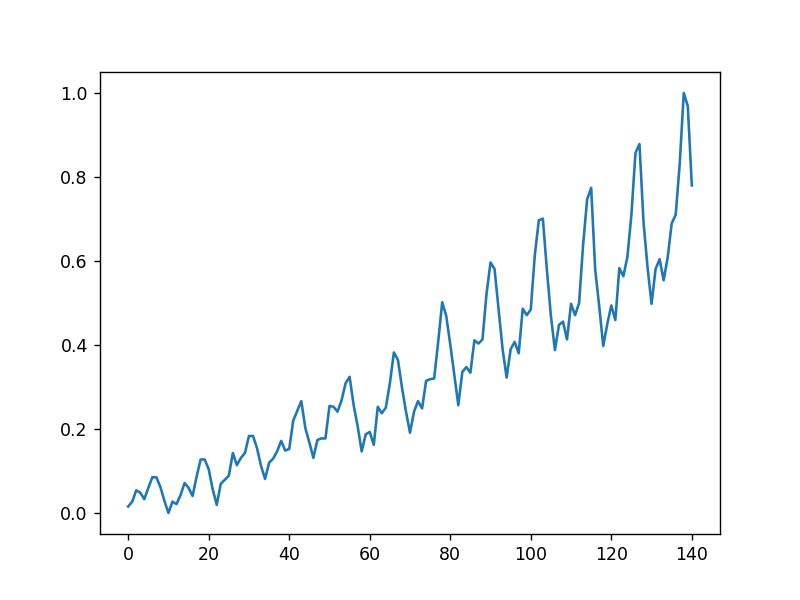

In [63]:
%matplotlib notebook
plt.plot(dataset)
plt.show()

In [64]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [65]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [66]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [67]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(8, input_shape=(1, look_back), return_sequences=True))
model.add(LSTM(8, return_sequences=True))
model.add(LSTM(4))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.fit(trainX, trainY, epochs=50, batch_size=1, verbose=2)

Epoch 1/50
 - 4s - loss: 0.0357 - acc: 0.0109
Epoch 2/50
 - 0s - loss: 0.0177 - acc: 0.0109
Epoch 3/50
 - 0s - loss: 0.0167 - acc: 0.0109
Epoch 4/50
 - 0s - loss: 0.0160 - acc: 0.0109
Epoch 5/50
 - 0s - loss: 0.0147 - acc: 0.0109
Epoch 6/50
 - 0s - loss: 0.0131 - acc: 0.0109
Epoch 7/50
 - 0s - loss: 0.0109 - acc: 0.0109
Epoch 8/50
 - 0s - loss: 0.0083 - acc: 0.0109
Epoch 9/50
 - 0s - loss: 0.0058 - acc: 0.0109
Epoch 10/50
 - 0s - loss: 0.0039 - acc: 0.0109
Epoch 11/50
 - 0s - loss: 0.0029 - acc: 0.0109
Epoch 12/50
 - 0s - loss: 0.0025 - acc: 0.0109
Epoch 13/50
 - 0s - loss: 0.0024 - acc: 0.0109
Epoch 14/50
 - 0s - loss: 0.0025 - acc: 0.0109
Epoch 15/50
 - 0s - loss: 0.0021 - acc: 0.0109
Epoch 16/50
 - 0s - loss: 0.0022 - acc: 0.0109
Epoch 17/50
 - 0s - loss: 0.0023 - acc: 0.0109
Epoch 18/50
 - 0s - loss: 0.0023 - acc: 0.0109
Epoch 19/50
 - 0s - loss: 0.0022 - acc: 0.0109
Epoch 20/50
 - 0s - loss: 0.0024 - acc: 0.0109
Epoch 21/50
 - 0s - loss: 0.0023 - acc: 0.0109
Epoch 22/50
 - 0s - lo

In [68]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [69]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [70]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 22.89 RMSE
Test Score: 49.06 RMSE


In [71]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [72]:
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

<IPython.core.display.Javascript object>


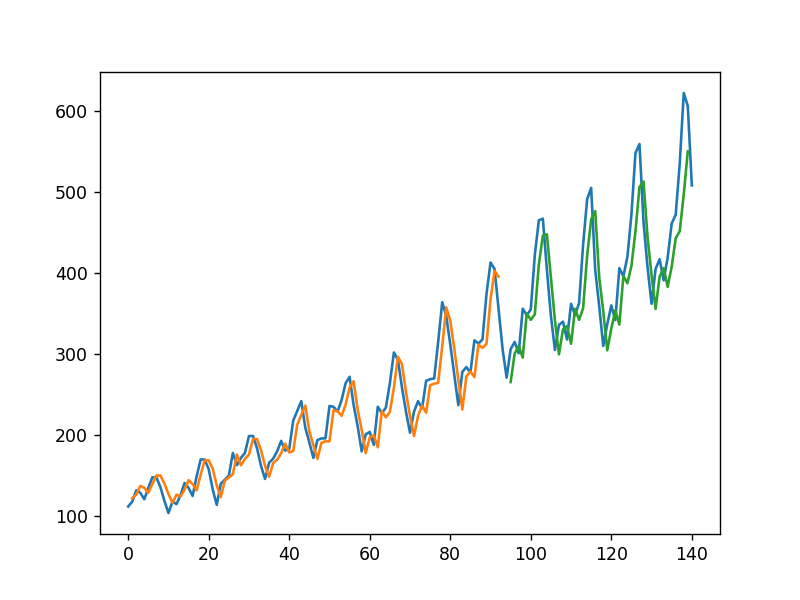

In [73]:
%matplotlib notebook
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()